# Taxi New York

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
from geopy import distance
import os
from sklearn.model_selection import cross_val_score
from sklearn.ensemble.forest import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



## Data loading

In [2]:
#train = pd.read_csv("./input/nyc-taxi-trip-duration/train.csv")
#test = pd.read_csv("./input/nyc-taxi-trip-duration/test.csv")
#sample = pd.read_csv("./input/nyc-taxi-trip-duration/sample_submission.csv")
import os
train = pd.read_csv("./input/train.csv")
test = pd.read_csv("./input/test.csv")
#sample = pd.read_csv("../input/sample_submission.csv")

## data exploration

In [3]:
train.shape,test.shape

((1458644, 11), (625134, 9))

In [4]:
train.head(10)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
5,id0801584,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.982857,40.742195,-73.992081,40.749184,N,443
6,id1813257,1,2016-06-17 22:34:59,2016-06-17 22:40:40,4,-73.969017,40.757839,-73.957405,40.765896,N,341
7,id1324603,2,2016-05-21 07:54:58,2016-05-21 08:20:49,1,-73.969276,40.797779,-73.922470,40.760559,N,1551
8,id1301050,1,2016-05-27 23:12:23,2016-05-27 23:16:38,1,-73.999481,40.738400,-73.985786,40.732815,N,255
9,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225


In [5]:
test.head(10)

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N
5,id0668992,1,2016-06-30 23:59:30,1,-73.991302,40.749798,-73.980515,40.786549,N
6,id1765014,1,2016-06-30 23:59:15,1,-73.978310,40.741550,-73.952072,40.717003,N
7,id0898117,1,2016-06-30 23:59:09,2,-74.012711,40.701527,-73.986481,40.719509,N
8,id3905224,2,2016-06-30 23:58:55,2,-73.992332,40.730511,-73.875618,40.875214,N
9,id1543102,2,2016-06-30 23:58:46,1,-73.993179,40.748760,-73.979309,40.761311,N


In [6]:
test.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
count,625134.000000,625134.000000,625134.000000,625134.000000,625134.000000,625134.000000
mean,1.534884,1.661765,-73.973614,40.750927,-73.973458,40.751816
std,0.498782,1.311293,0.073389,0.029848,0.072565,0.035824
min,1.000000,0.000000,-121.933128,37.389587,-121.933327,36.601322
25%,1.000000,1.000000,-73.991852,40.737392,-73.991318,40.736000
50%,2.000000,1.000000,-73.981743,40.754093,-73.979774,40.754543
75%,2.000000,2.000000,-73.967400,40.768394,-73.963013,40.769852
max,2.000000,9.000000,-69.248917,42.814938,-67.496796,48.857597


In [7]:
train.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [8]:
train.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [9]:
test.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
dtype: int64

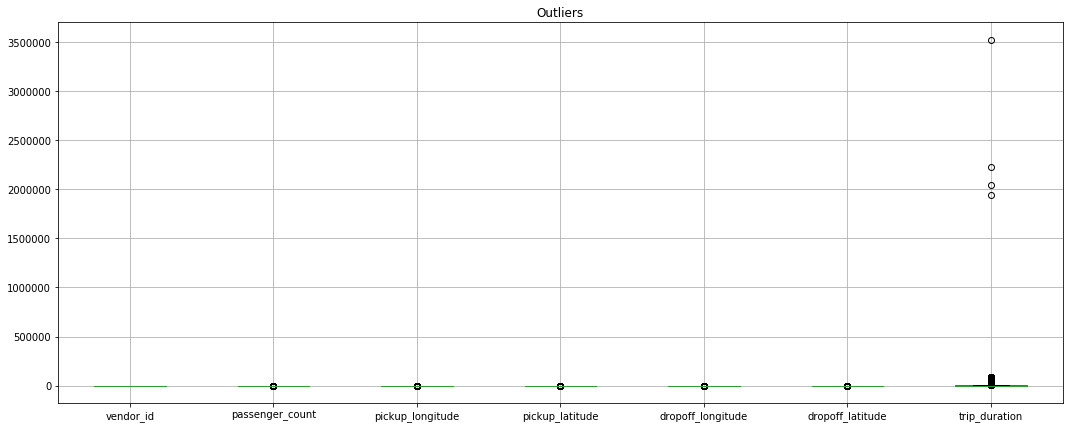

In [10]:
plt.subplots(figsize=(18,7))
plt.title("Outliers")
train.boxplot()

## data cleaning

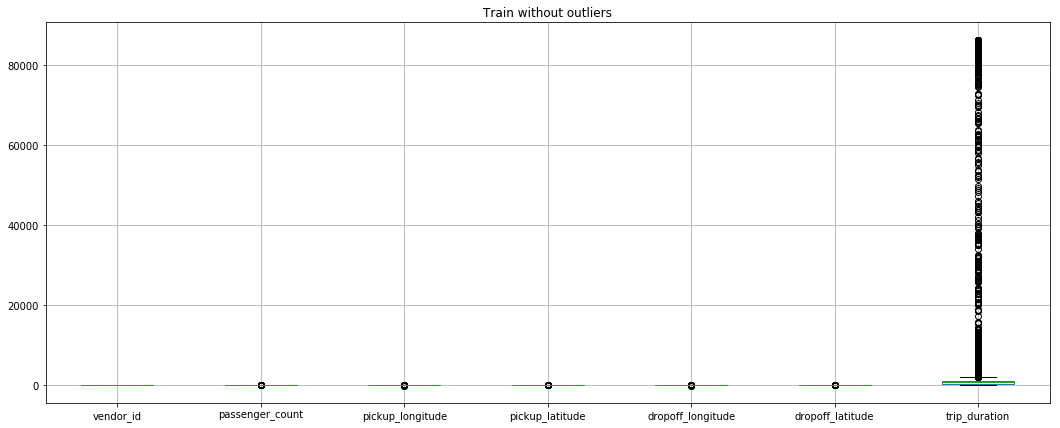

In [11]:
train = train.loc[train['trip_duration']< 1500000]
train = train.loc[train['trip_duration']> 60]
plt.subplots(figsize=(18,7))
plt.title("Train without outliers")
train.boxplot()

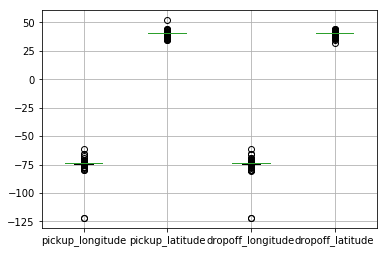

In [12]:
train[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].boxplot()

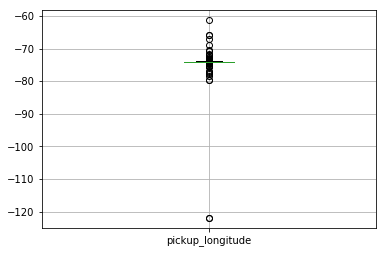

In [13]:
train[['pickup_longitude']].boxplot()

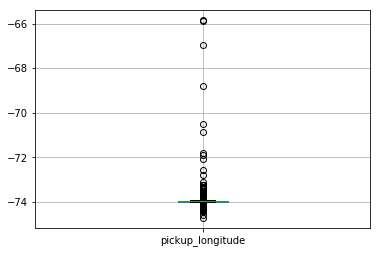

In [14]:
train = train.loc[train['pickup_longitude']>-75]      
train = train.loc[train['pickup_longitude']<-65]         
train[['pickup_longitude']].boxplot()

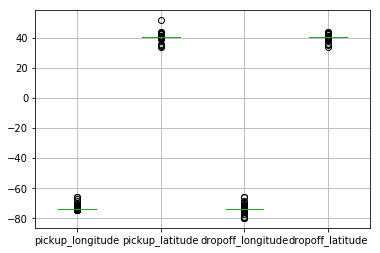

In [15]:
train[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].boxplot()

## Make more data

### Creat column for Day of the week, minute, hour, day and month

In [16]:
train['pickup_datetime']= pd.to_datetime(train.pickup_datetime, format='%Y-%m-%d %H:%M:%S')
train['day_of_the_date']=train.pickup_datetime.dt.dayofweek
train['month'] = train.pickup_datetime.dt.month
train['day'] = train.pickup_datetime.dt.day
train['hour'] = train.pickup_datetime.dt.hour
train['minute'] = train.pickup_datetime.dt.minute
train.head(5)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,day_of_the_date,month,day,hour,minute
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,0,3,14,17,24
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6,6,12,0,43
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,1,1,19,11,35
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2,4,6,19,32
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,5,3,26,13,30


In [17]:
test['pickup_datetime']= pd.to_datetime(test.pickup_datetime, format='%Y-%m-%d %H:%M:%S')
test['day_of_the_date']=test.pickup_datetime.dt.dayofweek
test['month'] = test.pickup_datetime.dt.month
test['day'] = test.pickup_datetime.dt.day
test['hour'] = test.pickup_datetime.dt.hour
test['minute'] = test.pickup_datetime.dt.minute
test.head(5)

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,day_of_the_date,month,day,hour,minute
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N,3,6,30,23,59
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N,3,6,30,23,59
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N,3,6,30,23,59
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N,3,6,30,23,59
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N,3,6,30,23,59


### Calculate the distance between pickup point and dropoff point

In [18]:
def distancer(row):
    coords_1 = (row['pickup_latitude'], row['pickup_longitude'])
    coords_2 = (row['dropoff_latitude'], row['dropoff_longitude'])
    return distance.distance(coords_1, coords_2).km

train['distance'] = train.apply(distancer, axis=1)
test['distance'] = test.apply(distancer, axis=1)

In [19]:
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,day_of_the_date,month,day,hour,minute,distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,0,3,14,17,24,1.502172
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6,6,12,0,43,1.808660
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,1,1,19,11,35,6.379687
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2,4,6,19,32,1.483632
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,5,3,26,13,30,1.187038


In [20]:
test.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,day_of_the_date,month,day,hour,minute,distance
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N,3,6,30,23,59,2.742863
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N,3,6,30,23,59,2.755774
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N,3,6,30,23,59,1.307112
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N,3,6,30,23,59,5.266978
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N,3,6,30,23,59,0.961745


## Features selection

In [21]:
train.columns,test.columns

(Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
        'passenger_count', 'pickup_longitude', 'pickup_latitude',
        'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
        'trip_duration', 'day_of_the_date', 'month', 'day', 'hour', 'minute',
        'distance'],
       dtype='object'),
 Index(['id', 'vendor_id', 'pickup_datetime', 'passenger_count',
        'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
        'dropoff_latitude', 'store_and_fwd_flag', 'day_of_the_date', 'month',
        'day', 'hour', 'minute', 'distance'],
       dtype='object'))

In [22]:
input_columns=['day_of_the_date', 'month', 'day', 'hour','distance', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']
y=train['trip_duration']
X=train[input_columns]
X_test=test[input_columns]

In [23]:
X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size=0.2, random_state=42)

In [24]:
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((1159878, 9), (289970, 9), (1159878,), (289970,))

## Entrainement

In [25]:
# n_estimators=19, min_samples_split=2, min_samples_leaf=4, max_features='auto', bootstrap=True, verbose=2
rfr = RandomForestRegressor(n_jobs=-1,n_estimators=19, min_samples_split=2, min_samples_leaf=4, max_features='auto', bootstrap=True, verbose=2)
rfr.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 19building tree 2 of 19building tree 3 of 19
building tree 4 of 19
building tree 5 of 19

building tree 6 of 19building tree 7 of 19
building tree 8 of 19
building tree 9 of 19


building tree 10 of 19
building tree 11 of 19
building tree 12 of 19
building tree 13 of 19
building tree 14 of 19
building tree 15 of 19
building tree 16 of 19
building tree 17 of 19
building tree 18 of 19
building tree 19 of 19


[Parallel(n_jobs=-1)]: Done   6 out of  19 | elapsed:   22.7s remaining:   49.3s
[Parallel(n_jobs=-1)]: Done  16 out of  19 | elapsed:   37.8s remaining:    7.1s
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:   37.9s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=4, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=19, n_jobs=-1,
           oob_score=False, random_state=None, verbose=2, warm_start=False)

In [26]:
cv_scores = cross_val_score(rfr, X_train, y_train, cv=5)
for i in range (len (cv_scores)):
    cv_scores[i]=np.sqrt(abs(cv_scores[i]))
print(np.mean(cv_scores))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  19 | elapsed:   19.0s remaining:   41.1s
[Parallel(n_jobs=-1)]: Done  16 out of  19 | elapsed:   30.7s remaining:    5.7s
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:   30.8s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   6 out of  19 | elapsed:    0.3s remaining:    0.6s
[Parallel(n_jobs=12)]: Done  16 out of  19 | elapsed:    0.4s remaining:    0.1s
[Parallel(n_jobs=12)]: Done  19 out of  19 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  19 | elapsed:   17.6s remaining:   38.2s
[Parallel(n_jobs=-1)]: Done  16 out of  19 | elapsed:   29.5s remaining:    5.5s
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:   29.6s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 con

0.09128493000939748


## Submission

In [27]:
train_pred=rfr.predict(X_test)
train_pred

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   6 out of  19 | elapsed:    0.6s remaining:    1.2s
[Parallel(n_jobs=12)]: Done  16 out of  19 | elapsed:    0.9s remaining:    0.2s
[Parallel(n_jobs=12)]: Done  19 out of  19 | elapsed:    0.9s finished


array([ 905.44819289,  611.78163196,  473.40471823, ..., 1602.48607504,
       2595.15092568, 1106.36593429])

In [28]:
len(train_pred)

625134

In [29]:
my_submission = pd.DataFrame({'id':test.id, 'trip_duration':train_pred})

In [30]:
my_submission.to_csv('sub.csv',index=False)